<a href="https://cognitiveclass.ai/">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Ad/CCLog.png" width="200" align="center">
</a>



<h1 align=center><font size = 5><b>A</b>pplication <b>P</b>rogramming <b>I</b>nterface</font> (API)</h1>

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API  

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://cocl.us/topNotebooksPython101Coursera">
         <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Ad/TopAd.png" width="750" align="center">
    </a>
</div>

## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref0">Pandas is an API</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

<p></p>
Estimated Time Needed: <strong>15 min</strong>
</div>

<hr>

In [ ]:
!pip install nba_api

<h2 id="PandasAPI">Pandas is an API </h2>

You will use this function in the lab:

In [1]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)
    return out_dict    

<h2 id="PandasAPI">Pandas is an API </h2>

Pandas is actually set of software components , much of  witch is not even written in Python.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

You create a dictionary, this is just data.

In [3]:
dict_={'a':[11,21,31],'b':[12,22,32]}

When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.

In [4]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%206/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />

When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.




In [5]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.

In [6]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>

<p>Rest API’s function by sending a <b>request</b>,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or <b>resource</b> to perform. In a similar manner, API returns a <b>response</b>, via an HTTP message, this response is usually contained within a JSON.</p>
<p>In this lab, we will use the <a href=https://pypi.org/project/nba-api/>NBA API</a> to determine how well the Golden State Warriors performed against the Toronto Raptors. We will use the API do the determined number of points the Golden State Warriors won or lost by for each game. So if the value is three, the Golden State Warriors won by three points. Similarly it the  Golden State Warriors lost  by two points the result will be negative two. The API is reltivly  will handle a lot of the details such a Endpoints and Authentication </p>

In the nba api to make a request for a specific team, it's quite simple, we don't require a JSON all we require is an id. This information is stored locally in the API we import the module teams 

In [9]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'nba_api'

In [10]:
#https://pypi.org/project/nba-api/

The method <code>get_teams()</code> returns a list of dictionaries  the dictionary key id has a unique identifier for each team as a value 

In [12]:
nba_teams = teams.get_teams()

NameError: name 'teams' is not defined

The dictionary key id has a unique identifier for each team as a value, let's look at the first three elements of the list:

In [ ]:
nba_teams[0:3]

To make things easier, we can convert the dictionary to a table. First, we use the function <code>one dict</code>, to create a dictionary. We use the common keys for each team as the keys,  the value is a list; each element of the list corresponds to the values for each team.
We then convert the dictionary to a dataframe, each row contains the information for a different team.

In [ ]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

Will use the team's nickname to find the unique id, we can see the row that contains the warriors by using the column nickname as follows:

In [ ]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

we can use the following line of code to access the first column of the dataframe:

In [ ]:
id_warriors=df_warriors[['id']].values[0][0]
#we now have an integer that can be used   to request the Warriors information 
id_warriors

The function "League Game Finder " will make an API call, its in the module <code>stats.endpoints</code> 

In [ ]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.  
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>gamefinder</code>.

<b>Note from Dr. Dvorak: </b>The following 3 cells of python code may fail if you have a Cloud IP or otherwise use a system that causes problems with the online API. If you have a problem skip down to the cell that describes how to import the data from a prepared datafile.

In [ ]:
# https://stats.nba.com does not allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commentted out online, but you can run it on jupyter labs on your own computer.
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

we can see the json file by running the following line of code. 

In [ ]:
# https://stats.nba.com does lot allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commentted out online, but you can run it on jupyter labs on your own computer.
gamefinder.get_json()

The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative the Warriors lost by that many points, if the value is positive, the warriors one by that amount of points. The column <code>MATCHUP </code>had the team the Warriors were playing, GSW stands for golden state and TOR means Toronto Raptors; <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.

In [ ]:
# https://stats.nba.com does lot allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is commentted outonline, but you can run it on jupyter labs on your own computer.
games = gamefinder.get_data_frames()[0]
games.head()

<b>Note from Dr. Dvorak: </b>If you are prevented from running the API, you can just download the dataframe as a single file. It is posted in the Canvas shell. Download it and put it in the directory with this notebook. Then uncomment the commands in the following cell and run it. If the above API code worked for you, this data is already imported, you can just continue with the processing.

In [ ]:
# file_name = "Golden_State.pkl"
# games = pd.read_pickle(file_name)
# games.head()

We can create two dataframes, one  for the games that the Warriors faced the raptors at home and the second for away games.

In [ ]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

We can calculate the mean for the column  <code>PLUS_MINUS</code> for the dataframes  <code>games_home</code> and <code> games_away</code>:

In [ ]:
games_home.mean()['PLUS_MINUS']

In [ ]:
games_away.mean()['PLUS_MINUS']

We can plot out the <code>PLUS MINUS</code> column for  for the dataframes  <code>games_home</code> and <code> games_away</code>.
We see the warriors played better at home.

NameError: name 'games_away' is not defined

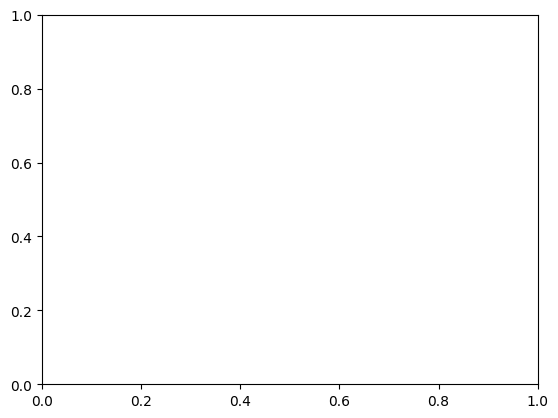

In [7]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

 <a href="http://cocl.us/NotebooksPython101bottom"><img src = "https://ibm.box.com/shared/static/irypdxea2q4th88zu1o1tsd06dya10go.png" width = 750, align = "center"></a>


#### About the Authors:  

 [Joseph Santarcangelo]( https://www.linkedin.com/in/joseph-s-50398b136/) has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Copyright &copy; 2017 [cognitiveclass.ai](https:cognitiveclass.ai). This notebook and its source code are released under the terms of the [MIT License](cognitiveclass.ai).